In [1]:
import sys 
import os
from os import path
root_path = os.path.dirname(os.getcwd())
sys.path.insert(0, root_path)

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [3]:
folder_type = "discrete"
dataset = "make_circles_3"
filename= "bins10_epochs200_arch5_lr0.15_samplepct1.csv"
root_path = path.dirname(os.getcwd())
filepath = path.join(root_path, "results", folder_type, dataset, filename)

In [5]:
df = pd.read_csv(filepath,sep=";")
scaler = MinMaxScaler()
df[["I(X,T)", "I(Y,T)"]] = scaler.fit_transform(df[["I(X,T)", "I(Y,T)"]])
df = df.round(3)
df.head()

,epoch,rand_init,layer,"I(X,T)","I(Y,T)",accuracy
0,0,1,1,0.855,0.927,0.622
1,0,1,2,0.174,0.111,0.622
2,1,1,1,0.854,0.922,0.623
3,1,1,2,0.179,0.100,0.623
4,2,1,1,0.853,0.942,0.626


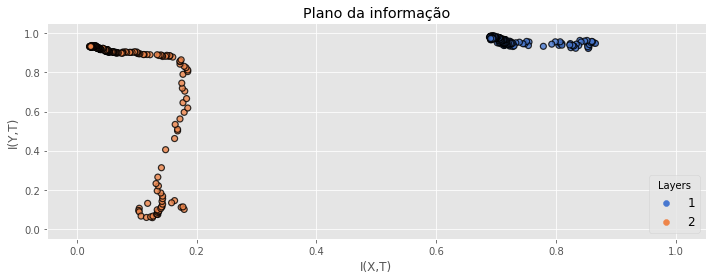

In [6]:
fig, ax = plt.subplots(figsize = (10,4))

g = sns.scatterplot(data=df.query("rand_init==1"), 
                    x='I(X,T)', 
                    y="I(Y,T)", 
                    hue="layer",
                    alpha=0.8,
                    edgecolor="black",
                    palette="muted",
                    linewidth=1.2,
                    cmap=sns.cubehelix_palette(as_cmap=True),
                    ax=ax)


def set_scatterplot_legend(ax, epoch):

    g.set_xlabel("I(X,T)", fontsize=12)
    g.set_ylabel("I(Y,T)", fontsize=12)

    leg = ax.legend(loc='lower right', 
                    title='Layers',
                    fontsize=12)
    # make opaque legend
    for lh in leg.legendHandles:
        fc_arr = lh.get_fc().copy()
        fc_arr[:, -1] = 1
        lh.set_fc(fc_arr)
        lh.set_alpha(1)

    return leg

leg = set_scatterplot_legend(g,epoch)
plt.title("Plano da informação")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tight_layout()
plt.show()

Aparentemente as trajetórias são melhor vistas para cada inicialização separada.

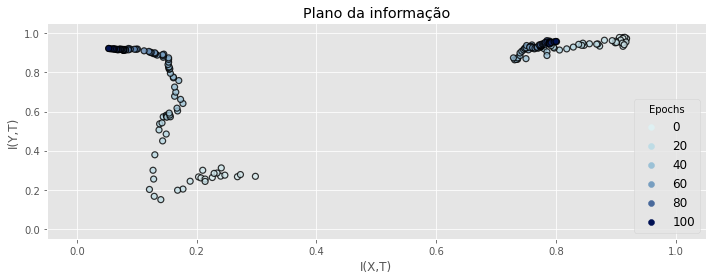

In [11]:
fig, ax = plt.subplots(figsize = (10,4))


scaler = LogNorm()
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cmap.colors = scaler(cmap.colors)

g = sns.scatterplot(data=df.query("rand_init==10 & epoch<=100"), 
                    x='I(X,T)', 
                    y="I(Y,T)", 
                    hue="epoch",
                    alpha=0.8,
                    edgecolor="black",
                    palette=cmap,
                    linewidth=1.2,
                    cmap=sns.cubehelix_palette(as_cmap=True),
                    ax=ax)


def set_scatterplot_legend(ax, epoch):

    g.set_xlabel("I(X,T)", fontsize=12)
    g.set_ylabel("I(Y,T)", fontsize=12)

    leg = ax.legend(loc='lower right', 
                    title='Epochs',
                    fontsize=12)
    # make opaque legend
    for lh in leg.legendHandles:
        fc_arr = lh.get_fc().copy()
        fc_arr[:, -1] = 1
        lh.set_fc(fc_arr)
        lh.set_alpha(1)

    return leg

leg = set_scatterplot_legend(g,epoch)
plt.title("Plano da informação")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tight_layout()
plt.show()

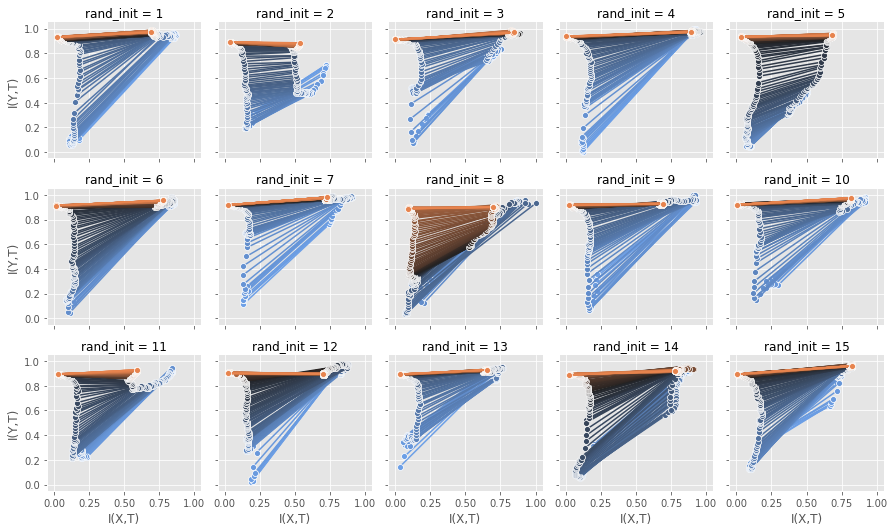

In [10]:
g = sns.FacetGrid(df, col="rand_init", height=2.5, col_wrap=5)
g.map_dataframe(sns.lineplot, 
                x="I(X,T)", 
                y="I(Y,T)",
                hue="epoch", 
                estimator=None, 
                marker="o",
                palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True),
                legend=None)
